# 5. 差分の描画


In [1]:
import os
import cv2
import re

In [47]:
from glob import glob

# paths = sorted(glob('../data/P_Wi2/diff_thresh_pre_noise_removing_pileup/*'))
paths = sorted(glob('../data/P_Pe2_o/diff_thresh_pre_noise_removing_pileup_ogstep/*'))
paths

['../data/P_Pe2_o/diff_thresh_pre_noise_removing_pileup_ogstep/P_Pe2_06d_IMG_9392.png',
 '../data/P_Pe2_o/diff_thresh_pre_noise_removing_pileup_ogstep/P_Pe2_08d_IMG_9410.png',
 '../data/P_Pe2_o/diff_thresh_pre_noise_removing_pileup_ogstep/P_Pe2_10d_IMG_9428.png',
 '../data/P_Pe2_o/diff_thresh_pre_noise_removing_pileup_ogstep/P_Pe2_11d_IMG_9437.png',
 '../data/P_Pe2_o/diff_thresh_pre_noise_removing_pileup_ogstep/P_Pe2_13d_IMG_9455.png']

In [1]:
# 描画色の指定
colors = [(255/255, 47/255, 0/255), (182/255, 255/255, 55/255), (0/255, 252/255, 202/255), (128/255, 0/255, 128/255)]
colors

[(1.0, 0.1843137254901961, 0.0),
 (0.7137254901960784, 1.0, 0.21568627450980393),
 (0.0, 0.9882352941176471, 0.792156862745098),
 (0.5019607843137255, 0.0, 0.5019607843137255)]

In [2]:
# caption画像の読み込み（パワポで作るのが楽）
caption = cv2.imread('../../caption.png')
caption.shape

NameError: name 'cv2' is not defined

In [3]:
# 描画の台紙となる画像の選定、1日目のセグメンテーション画像を指定
base_path = '../data/P_Pe2_o/diff_thresh_pre_noise_removing_pileup_ogstep/P_Pe2_06d_IMG_9392.png'
base_img = cv2.imread(base_path)

# mask = cv2.bitwise_not(base_img)[:,:,0].squeeze()
for path, color in zip(paths[1:], colors):
    diff = cv2.imread(path)
    ret,thresh = cv2.threshold(diff,1,1,0)
    thresh[:,:,0] *= int(color[2] * 255)
    thresh[:,:,1] *= int(color[1] * 255)
    thresh[:,:,2] *= int(color[0] * 255)
    thresh = cv2.bitwise_and(thresh, thresh, mask=mask)
#     thresh[:,:,0] *= color[2]
#     thresh[:,:,1] *= color[1]
#     thresh[:,:,2] *= color[0]

    base_img = base_img + thresh
#     cv2.imwrite(base_path.replace('transformed_seg_noise_removed/P_Pe2_06d_IMG_9392.png', 'diff_thresh_pre_noise_removing_pileup_ogstep.png'), base_img)
    cv2.imwrite(base_path.replace('diff_thresh_pre_noise_removing_pileup_ogstep/P_Pe2_06d_IMG_9392.png', 'diff_thresh_pre_noise_removing_pileup_ogstep.png'), base_img)
    

NameError: name 'cv2' is not defined

In [72]:
img = cv2.imread('../data/P_Pe2_o/draw_diff.png')
caption = cv2.imread('../data/caption.png')
h, w, _ = caption.shape

img[:h, -w:, :] = caption
cv2.imwrite('../data/draw_diff_with_caption.png', img)

True

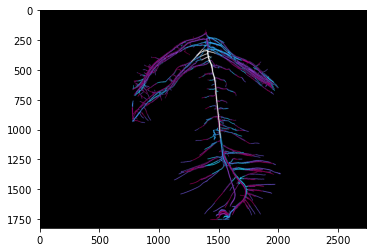

In [27]:
import matplotlib.pyplot as plt

plt.imshow(base_img)

In [8]:
for fname in fnames:
    date = re.findall('_(\d+).', fname)[0]
    root = re.findall('(.+)_', fname)[0]
    color = color_dic[date]
    if date == '211122':
        img = cv2.imread('../../noise-removed/' + fname)
        img_ = img + 0
        img_[:420, -360:, :] = caption
        cv2.imwrite('../draw_diff/' + fname, img_)
    else:
        diff = cv2.imread('../diff_er2dl/' + fname)
        ret,thresh = cv2.threshold(diff,1,1,0)
        thresh[:,:,0] *= color[2]
        thresh[:,:,1] *= color[1]
        thresh[:,:,2] *= color[0]
        img_ = img_ + thresh
        cv2.imwrite('../draw_diff/' + fname, img_)
#     break

In [9]:
for fname in fnames:
    date = re.findall('_(\d+).', fname)[0]
    root = re.findall('(.+)_', fname)[0]
    color = color_dic[date]
    if date == '211122':
        img = cv2.imread('../../noise-removed/' + fname)
        img_ = img + 0
        img_[:420, -360:, :] = caption
        cv2.imwrite('../draw_diff_connect/' + fname, img_)
    else:
        diff = cv2.imread('../diff_connect/' + fname)
        ret,thresh = cv2.threshold(diff,1,1,0)
        thresh[:,:,0] *= color[2]
        thresh[:,:,1] *= color[1]
        thresh[:,:,2] *= color[0]
        img_ = img_ + thresh
        cv2.imwrite('../draw_diff_connect/' + fname, img_)
#     break

In [23]:
for fname in fnames:
    diff1 = cv2.imread('../../draw_diff/' + fname)
    diff2 = cv2.imread('../draw_diff/' + fname)
    diff1_ = diff1[:,900:2000,:]
    diff2_ = diff2[:,900:2000,:]
    dst = np.hstack((diff1_, diff2_))
    cv2.imwrite('../check_draw_diff/' + fname, dst)
#     break

In [14]:
print(diff1.shape)
print('(y, x, c)')

(1824, 2736, 3)
(y, x, c)
